# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
output_dir = output_data_file.split('/')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = [] #?? get country code from citipy? 

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create url
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_keys.api_key}&q={city}&units={units}"

In [4]:
# loop thru all cities, check if city can be found in openweathermap
# if found, add city to bucket set; if not found, skip and continue
# OpenWeatherMap free account allows 60 calls/min, 
# request 50 cities at a time, wait 55secs then continue loop

city = []       #response["name"]
cloudiness = [] #response["clouds"]["all"]
country = []    #response["sys"]["country"]
date = []       #response["dt"]
humidity = []   #response["main"]["humidity"]
lat = []        #response["coord"]["lat"]
lng = []        #response["coord"]["lon"]
max_temp = []   #response["main"]["temp_max"]
wind_speed = [] #response["wind"]["speed"]
city_not_found = []
sleep_interval = 0

basket_counter = 1
city_counter = 0

newline = '\n'
first_line = "Beginning Data Retrieval"
last_line = "Data Retrieval Complete"
just_line = "-------------------------------------"
not_found = "City not found... Skipping"
print(first_line)
print(just_line)
output_log = os.path.join(output_dir[0], "output_log.txt")
with open(output_log, 'w', newline='') as logfile:
    logfile.write(first_line + newline)
    logfile.write(just_line + newline)
    
    start_time = time.time()
    
    for x in range(len(cities)):

        query_url = f"{url}appid={api_keys.api_key}&q={cities[x]}&units={units}"
        
        response = requests.get(query_url).json()

        try:
            city.append(response["name"])

            try:
                country.append(response["sys"]["country"])
                date.append(response["dt"])
                humidity.append(response["main"]["humidity"])
                lat.append(response["coord"]["lat"])
                lng.append(response["coord"]["lon"])
                max_temp.append(response["main"]["temp_max"])
                wind_speed.append(response["wind"]["speed"])
                cloudiness.append(response["clouds"]["all"])

                city_counter += 1
                process_msg = f"Processing Record {city_counter} of Set {basket_counter} | {cities[x]}"
                print(process_msg)
                print(query_url)
                logfile.write(process_msg + newline)
                logfile.write(query_url + newline)
                
                if (len(city) % 50) == 0:
                    sleep_interval = time.time() - start_time
                    basket_counter += 1
                    city_counter = 0
                    time.sleep(60 - sleep_interval)
                    start_time = time.time()

            except:
                process_msg = "Other error."
                print(process_msg)
                logfile.write(process_msg + newline)
                pass

        except:
            process_msg = f"{not_found} {cities[x]}"
            print(process_msg)
            logfile.write(process_msg + newline)
            city_not_found.append(cities[x])
            pass

    logfile.write(just_line + newline)
    logfile.write(last_line + newline)
    logfile.write(just_line + newline)


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=san cristobal&units=imperial
Processing Record 2 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=avarua&units=imperial
Processing Record 3 of Set 1 | vao
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vao&units=imperial
City not found... Skipping illoqqortoormiut
Processing Record 4 of Set 1 | albany
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=albany&units=imperial
Processing Record 5 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=butaritari&units=imperial
Processing Record 6 of Set 1 | khatanga
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=khatanga&

Processing Record 4 of Set 2 | pontes e lacerda
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=pontes e lacerda&units=imperial
Processing Record 5 of Set 2 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port alfred&units=imperial
City not found... Skipping halalo
City not found... Skipping saleaula
Processing Record 6 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=hobart&units=imperial
Processing Record 7 of Set 2 | sabirabad
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sabirabad&units=imperial
Processing Record 8 of Set 2 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kasongo-lunda&units=imperial
Processing Record 9 of Set 2 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=barrow&units=i

Processing Record 7 of Set 3 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=laguna&units=imperial
Processing Record 8 of Set 3 | toppenish
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=toppenish&units=imperial
Processing Record 9 of Set 3 | invermere
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=invermere&units=imperial
Processing Record 10 of Set 3 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=porto novo&units=imperial
Processing Record 11 of Set 3 | margate
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=margate&units=imperial
Processing Record 12 of Set 3 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=longyearbyen&units=imperial
Processing Record 13 of Set 3 | roald
http://api.openweathermap.org/data/2.

Processing Record 10 of Set 4 | burns lake
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=burns lake&units=imperial
Processing Record 11 of Set 4 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=saint-philippe&units=imperial
Processing Record 12 of Set 4 | fergus falls
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=fergus falls&units=imperial
Processing Record 13 of Set 4 | meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=meulaboh&units=imperial
Processing Record 14 of Set 4 | urumqi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=urumqi&units=imperial
Processing Record 15 of Set 4 | east london
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=east london&units=imperial
Processing Record 16 of Set 4 | klaksvik
http://api.open

Processing Record 15 of Set 5 | novo aripuana
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=novo aripuana&units=imperial
Processing Record 16 of Set 5 | quthing
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=quthing&units=imperial
Processing Record 17 of Set 5 | kalaleh
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kalaleh&units=imperial
Processing Record 18 of Set 5 | matara
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=matara&units=imperial
Processing Record 19 of Set 5 | trat
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=trat&units=imperial
Processing Record 20 of Set 5 | andros town
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=andros town&units=imperial
Processing Record 21 of Set 5 | beloha
http://api.openweathermap.org/data/2.5/weat

Processing Record 18 of Set 6 | sovetskiy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=sovetskiy&units=imperial
Processing Record 19 of Set 6 | venice
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=venice&units=imperial
City not found... Skipping bokspits
Processing Record 20 of Set 6 | poway
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=poway&units=imperial
Processing Record 21 of Set 6 | port augusta
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=port augusta&units=imperial
Processing Record 22 of Set 6 | san felipe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=san felipe&units=imperial
Processing Record 23 of Set 6 | urucara
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=urucara&units=imperial
Processing Record 24 of Set 6 | toba
http://

City not found... Skipping formoso do araguaia
Processing Record 21 of Set 7 | brigantine
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=brigantine&units=imperial
Processing Record 22 of Set 7 | ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ambilobe&units=imperial
Processing Record 23 of Set 7 | olinda
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=olinda&units=imperial
Processing Record 24 of Set 7 | mezhdurechensk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=mezhdurechensk&units=imperial
Processing Record 25 of Set 7 | elk city
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=elk city&units=imperial
City not found... Skipping meyungs
City not found... Skipping paradwip
Processing Record 26 of Set 7 | makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=a967d3

Processing Record 24 of Set 8 | kismayo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=kismayo&units=imperial
Processing Record 25 of Set 8 | niamey
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=niamey&units=imperial
Processing Record 26 of Set 8 | middelburg
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=middelburg&units=imperial
Processing Record 27 of Set 8 | marzuq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=marzuq&units=imperial
Processing Record 28 of Set 8 | fort-shevchenko
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=fort-shevchenko&units=imperial
Processing Record 29 of Set 8 | vrangel
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=vrangel&units=imperial
Processing Record 30 of Set 8 | kisesa
http://api.openweathermap.org/data/2.

Processing Record 29 of Set 9 | miandrivazo
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=miandrivazo&units=imperial
Processing Record 30 of Set 9 | bereznik
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=bereznik&units=imperial
Processing Record 31 of Set 9 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=marawi&units=imperial
Processing Record 32 of Set 9 | troitsko-pechorsk
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=troitsko-pechorsk&units=imperial
Processing Record 33 of Set 9 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=deputatskiy&units=imperial
Processing Record 34 of Set 9 | narasannapeta
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=narasannapeta&units=imperial
Processing Record 35 of Set 9 | chulumani
http

Processing Record 33 of Set 10 | asau
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=asau&units=imperial
Processing Record 34 of Set 10 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=maniitsoq&units=imperial
Processing Record 35 of Set 10 | dashitou
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=dashitou&units=imperial
Processing Record 36 of Set 10 | ostersund
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ostersund&units=imperial
Processing Record 37 of Set 10 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=naryan-mar&units=imperial
Processing Record 38 of Set 10 | monroe
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=monroe&units=imperial
Processing Record 39 of Set 10 | sherbakul
http://api.openweathermap.org/data/2.

Processing Record 37 of Set 11 | pizarro
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=pizarro&units=imperial
Processing Record 38 of Set 11 | parsons
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=parsons&units=imperial
Processing Record 39 of Set 11 | aitape
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=aitape&units=imperial
Processing Record 40 of Set 11 | ningxiang
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=ningxiang&units=imperial
Processing Record 41 of Set 11 | valparaiso
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=valparaiso&units=imperial
Processing Record 42 of Set 11 | yaan
http://api.openweathermap.org/data/2.5/weather?appid=a967d36dec1a79215b05e18771f66619&q=yaan&units=imperial
Processing Record 43 of Set 11 | pierre
http://api.openweathermap.org/data/2.5/weather

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create city data frame
city_df = pd.DataFrame({"City" : city,
                       "Cloudiness" : cloudiness,
                       "Country" : country,
                       "Date" : date,
                       "Humidity" : humidity,
                       "Lat" : lat,
                       "Lng" : lng,
                       "Max Temp" : max_temp,
                       "Wind Speed" : wind_speed})

city_df.count()

City          576
Cloudiness    576
Country       576
Date          576
Humidity      576
Lat           576
Lng           576
Max Temp      576
Wind Speed    576
dtype: int64

In [6]:
#export to csv file
output_file = os.path.join(output_dir[0], output_dir[1])
city_df.to_csv(output_file, index=True)

In [7]:
city_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    San Cristobal          40      VE  1604609349        58   7.77  -72.22   
1           Avarua          81      CK  1604609591        83 -21.21 -159.78   
2              Vao           0      NC  1604609591        83 -22.67  167.48   
3           Albany          75      US  1604609488        45  42.60  -73.97   
4       Butaritari          32      KI  1604609591        78   3.07  172.79   
..             ...         ...     ...         ...       ...    ...     ...   
571       Longonjo          99      AO  1604610248        81 -12.91   15.25   
572        Itarema           0      BR  1604610254        75  -2.92  -39.92   
573          Ndélé         100      CF  1604610254        49   8.41   20.65   
574      Grindavik          75      IS  1604609975        75  63.84  -22.43   
575  Bueno Brandão          30      BR  1604610254        78 -22.44  -46.35   

     Max Temp  Wind Speed  
0       87.80       12.75  
1       73.40       13.87  
2       74.62        9.40  
3       66.20       11.41  
4       81.79        8.90  
..        ...         ...  
571     65.97        1.97  
572     80.28       15.01  
573     75.72        0.60  
574     41.00       40.26  
575     61.83        3.24  

[576 rows x 9 columns]

In [8]:
city_df.describe()

Cloudiness          Date    Humidity         Lat         Lng  \
count  576.000000  5.760000e+02  576.000000  576.000000  576.000000   
mean    49.720486  1.604610e+09   70.347222   20.418872   15.259062   
std     39.773008  2.231107e+02   21.666185   32.825680   88.045252   
min      0.000000  1.604609e+09   11.000000  -54.800000 -179.170000   
25%      2.000000  1.604610e+09   57.000000   -5.797500  -64.740000   
50%     46.000000  1.604610e+09   76.000000   25.035000   24.120000   
75%     90.000000  1.604610e+09   87.000000   47.117500   87.300000   
max    100.000000  1.604610e+09  100.000000   78.220000  178.420000   

         Max Temp  Wind Speed  
count  576.000000  576.000000  
mean    59.500278    8.285451  
std     22.591429    6.366329  
min     -8.880000    0.220000  
25%     46.400000    3.937500  
50%     65.860000    6.930000  
75%     77.000000   11.410000  
max    104.290000   51.270000

**Remove cities where Humidity > 100%**  
Not necessary if there are no cities with Humidity > 100%

In [9]:
humid_cities = city_df["City"].loc[city_df["Humidity"] > 100].count()
if humid_cities > 0:
    city_df = city_df.loc[city_df["Humidity"] <= 100]
city_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    San Cristobal          40      VE  1604609349        58   7.77  -72.22   
1           Avarua          81      CK  1604609591        83 -21.21 -159.78   
2              Vao           0      NC  1604609591        83 -22.67  167.48   
3           Albany          75      US  1604609488        45  42.60  -73.97   
4       Butaritari          32      KI  1604609591        78   3.07  172.79   
..             ...         ...     ...         ...       ...    ...     ...   
571       Longonjo          99      AO  1604610248        81 -12.91   15.25   
572        Itarema           0      BR  1604610254        75  -2.92  -39.92   
573          Ndélé         100      CF  1604610254        49   8.41   20.65   
574      Grindavik          75      IS  1604609975        75  63.84  -22.43   
575  Bueno Brandão          30      BR  1604610254        78 -22.44  -46.35   

     Max Temp  Wind Speed  
0       87.80       12.75  
1       73.40       13.87  
2       74.62        9.40  
3       66.20       11.41  
4       81.79        8.90  
..        ...         ...  
571     65.97        1.97  
572     80.28       15.01  
573     75.72        0.60  
574     41.00       40.26  
575     61.83        3.24  

[576 rows x 9 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

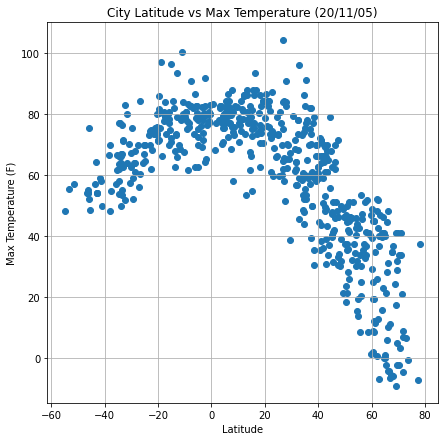

In [10]:
# create a scatter plot latitude v temperature
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
x_lat = city_df['Lat']
y_temp = city_df['Max Temp']
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(x_lat, y_temp)
plt.title(f"City Latitude vs Max Temperature ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_temp.png")
plt.savefig(file)


#### Latitude vs. Humidity Plot

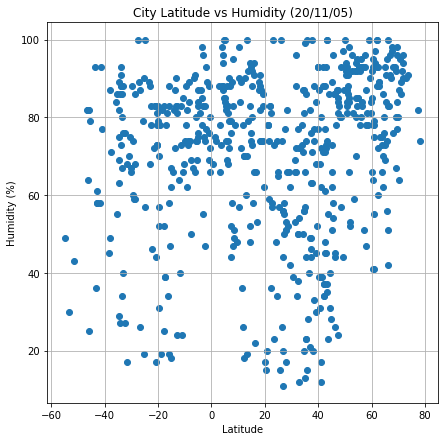

In [11]:
y_hum = city_df["Humidity"]

fig, ax1 = plt.subplots(figsize=(7,7))
ax1.set_autoscale_on(True)
ax1.scatter(x_lat, y_hum)
plt.title(f"City Latitude vs Humidity ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_humid.png")
plt.savefig(file)

#### Latitude vs. Cloudiness Plot

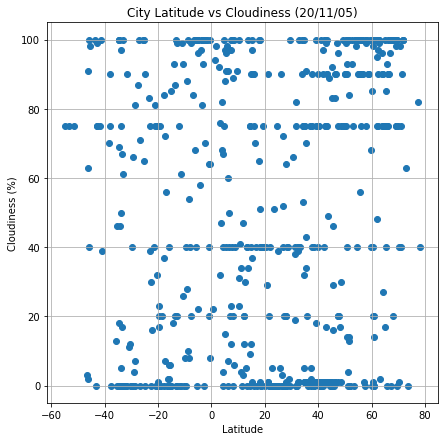

In [12]:
y_cloud = city_df["Cloudiness"]
fig, ax2 = plt.subplots(figsize=(7,7))
ax2.set_autoscale_on(True)
ax2.scatter(x_lat, y_cloud)
plt.title(f"City Latitude vs Cloudiness ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_cloud.png")
plt.savefig(file)

#### Latitude vs. Wind Speed Plot

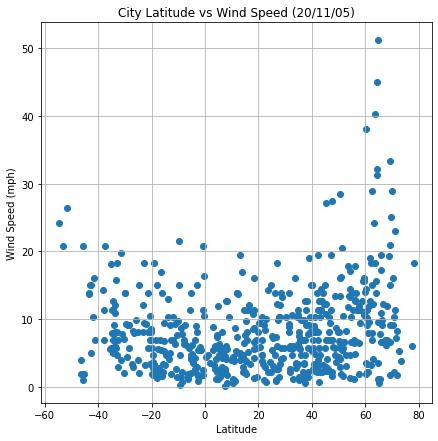

In [13]:
y_wind = city_df["Wind Speed"]
fig, ax3 = plt.subplots(figsize=(7,7))
ax3.set_autoscale_on(True)
ax3.scatter(x_lat, y_wind)
plt.title(f"City Latitude vs Wind Speed ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#plt.show()
file = os.path.join("images", "lat_wind.png")
plt.savefig(file)

## Linear Regression

In [14]:
# dependencies
import scipy.stats as st

### Create data frame for northern and southern hemispheres

In [15]:
# northern hemisphere data frame
north_df = city_df[city_df["Lat"] >= 0]
north_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0    San Cristobal          40      VE  1604609349        58   7.77  -72.22   
3           Albany          75      US  1604609488        45  42.60  -73.97   
4       Butaritari          32      KI  1604609591        78   3.07  172.79   
5         Khatanga         100      RU  1604609592        90  71.97  102.50   
6       Winnemucca           1      US  1604609297        12  40.97 -117.74   
..             ...         ...     ...         ...       ...    ...     ...   
568       Havelock           5      US  1604610230        56  34.88  -76.90   
569           Ipil         100      PH  1604610253        89   7.75  122.52   
570         Mishan          16      CN  1604610254        96  45.55  131.88   
573          Ndélé         100      CF  1604610254        49   8.41   20.65   
574      Grindavik          75      IS  1604609975        75  63.84  -22.43   

     Max Temp  Wind Speed  
0       87.80       12.75  
3       66.20       11.41  
4       81.79        8.90  
5       -4.61        1.79  
6       71.60        3.36  
..        ...         ...  
568     73.99       11.41  
569     75.61        4.14  
570     31.48        4.12  
573     75.72        0.60  
574     41.00       40.26  

[403 rows x 9 columns]

In [16]:
# southern hemisphere data frame
south_df = city_df[city_df["Lat"] < 0]
south_df

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
1           Avarua          81      CK  1604609591        83 -21.21 -159.78   
2              Vao           0      NC  1604609591        83 -22.67  167.48   
10      Bredasdorp         100      ZA  1604609592        82 -34.53   20.04   
16    Punta Arenas          75      CL  1604609593        30 -53.15  -70.92   
17         Rikitea          39      PF  1604609593        68 -23.12 -134.97   
..             ...         ...     ...         ...       ...    ...     ...   
566   Christchurch         100      NZ  1604610178        93 -43.53  172.63   
567      Sandy Bay          75      AU  1604610253        58 -42.91  147.35   
571       Longonjo          99      AO  1604610248        81 -12.91   15.25   
572        Itarema           0      BR  1604610254        75  -2.92  -39.92   
575  Bueno Brandão          30      BR  1604610254        78 -22.44  -46.35   

     Max Temp  Wind Speed  
1       73.40       13.87  
2       74.62        9.40  
10      66.20       12.75  
16      55.40       20.80  
17      74.35       12.08  
..        ...         ...  
566     57.00       13.87  
567     54.00       14.99  
571     65.97        1.97  
572     80.28       15.01  
575     61.83        3.24  

[173 rows x 9 columns]

### Northern Hemisphere - Max Temperature vs Latitude

In [17]:
north_x_lat = north_df["Lat"]
north_y_temp = north_df["Max Temp"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {round(n_temp.rvalue,2)}")


correlation coefficient: -0.83
The r-value is -0.83


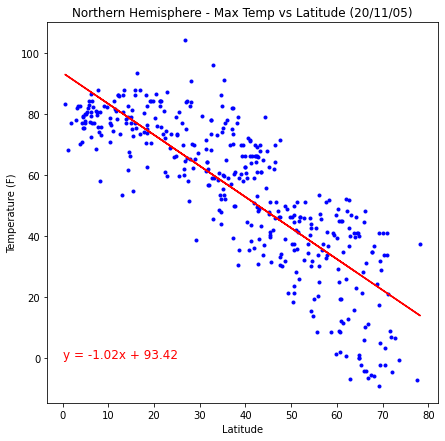

In [18]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("images", "north_lat_temp.png")
plt.savefig(file)

### Southern Hemisphere - Max Temperature vs Latitude

In [19]:
south_x_lat = south_df["Lat"]
south_y_temp = south_df["Max Temp"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")


correlation coefficient: 0.68
The r-value is 0.6815327590508988


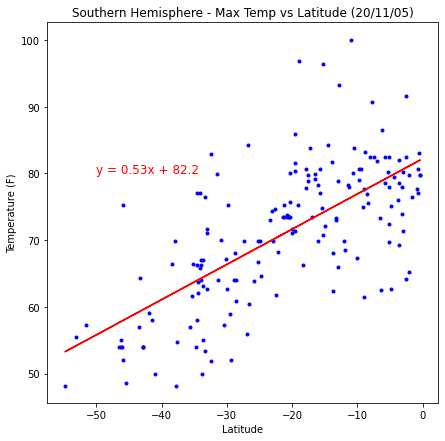

In [20]:
#create equation of line
line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope,2)}x + {round(s_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("images", "south_lat_temp.png")
plt.savefig(file)

**Temperature (F) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coeffient and linear regression model shows a strong negative correlation between latitude and maximum temperature in the northern hemisphere. As the latitude decreases, the temperature increases.

* In the southern hemisphere, the correlation coefficient and linear regression model shows a moderate positive correlation between latitude and maximum temperature. As the latitude increases towards zero, the temperature increases as well.


### Northern Hemisphere - Humidity (%) vs Latitude

In [21]:
north_y_hum = north_df["Humidity"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_hum)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_humid = st.linregress(north_x_lat, north_y_hum)
print(f"The r-value is {n_humid.rvalue}")


correlation coefficient: 0.18
The r-value is 0.18298152125151387


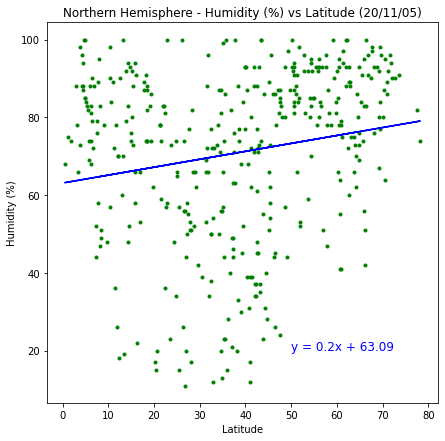

In [22]:
#create equation of line
line = n_humid.slope * north_x_lat + n_humid.intercept
line_eq = f"y = {round(n_humid.slope,2)}x + {round(n_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, nh = plt.subplots(figsize=(7,7))
nh.set_autoscale_on(True)
nh.scatter(north_x_lat, north_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,20), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_humid.png")
plt.savefig(file)

### Southern Hemisphere - Humidity (%) vs Latitude

In [23]:
south_y_hum = south_df["Humidity"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_hum)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_humid = st.linregress(south_x_lat, south_y_hum)
print(f"The r-value is {s_humid.rvalue}")


correlation coefficient: 0.17
The r-value is 0.17106282293916597


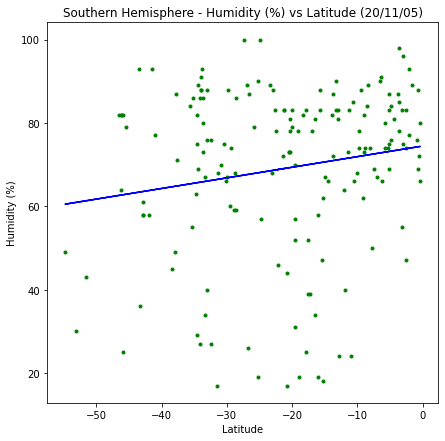

In [24]:
#create equation of line
line = s_humid.slope * south_x_lat + s_humid.intercept
line_eq = f"y = {round(s_humid.slope,2)}x + {round(s_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, sh = plt.subplots(figsize=(7,7))
sh.set_autoscale_on(True)
sh.scatter(south_x_lat, south_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,10), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_humid.png")
plt.savefig(file)

**Humidity (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficent and linear regression model for humidity vs latitude shows a fairly positive correlation for both hemispheres.

### Northern Hemisphere - Cloudiness (%) vs Latitude

In [25]:
north_y_cloud = north_df["Cloudiness"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_cloud)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"The r-value is {north_cloud.rvalue}")

correlation coefficient: 0.24
The r-value is 0.24161214392949237


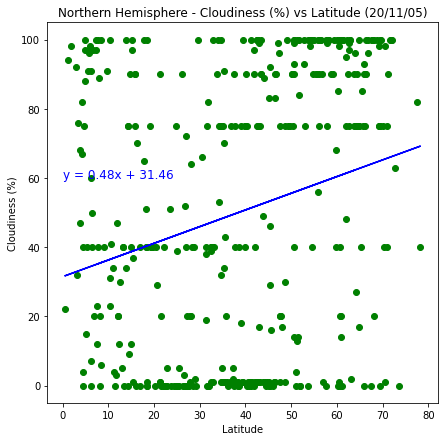

In [26]:
#create equation of line
line = north_cloud.slope * north_x_lat + north_cloud.intercept
line_eq = f"y = {round(north_cloud.slope,2)}x + {round(north_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nc = plt.subplots(figsize=(7,7))
nc.set_autoscale_on(True)
nc.scatter(north_x_lat, north_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (0, 60), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_cloud.png")
plt.savefig(file)

### Southern Hemisphere - Cloudiness (%) vs Latitude

In [27]:
south_y_cloud = south_df["Cloudiness"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_cloud)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"The r-value is {south_cloud.rvalue}")

correlation coefficient: 0.1
The r-value is 0.1004986469783198


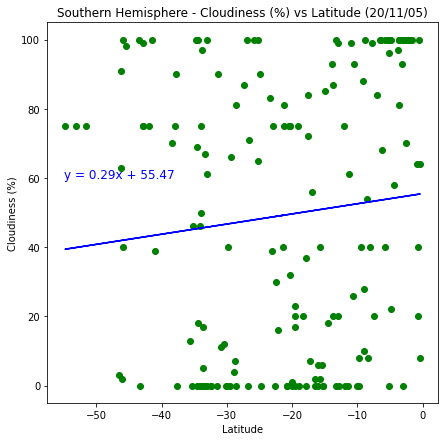

In [28]:
#create equation of line
line = south_cloud.slope * south_x_lat + south_cloud.intercept
line_eq = f"y = {round(south_cloud.slope,2)}x + {round(south_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, sc = plt.subplots(figsize=(7,7))
sc.set_autoscale_on(True)
sc.scatter(south_x_lat, south_y_cloud, marker='o', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55, 60), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_cloud.png")
plt.savefig(file)

**Cloudiness (%) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between cloudiness and latitude in the northern hemisphere and an even weaker positive correlation in the southern hemisphere.

### Northern Hemisphere - Wind Speed (mph) vs Latitude

In [29]:
north_y_wind = north_df["Wind Speed"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_wind)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_wind = st.linregress(north_x_lat, north_y_wind)
print(f"The r-value is {north_wind.rvalue}")

correlation coefficient: 0.35
The r-value is 0.3537847488209283


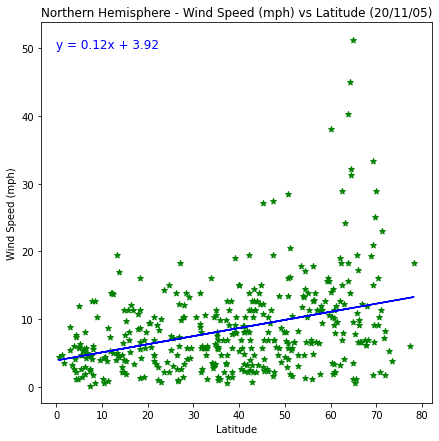

In [30]:
#create equation of line
line = north_wind.slope * north_x_lat + north_wind.intercept
line_eq = f"y = {round(north_wind.slope,2)}x + {round(north_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'b-')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (0, 50), fontsize=12, color="blue")

file = os.path.join("images", "north_lat_wind.png")
plt.savefig(file)

### Southern Hemisphere - Wind Speed (mph) vs Latitude

In [31]:
south_y_wind = south_df["Wind Speed"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_wind)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_wind = st.linregress(south_x_lat, south_y_wind)
print(f"The r-value is {south_wind.rvalue}")

correlation coefficient: -0.31
The r-value is -0.31254569660128045


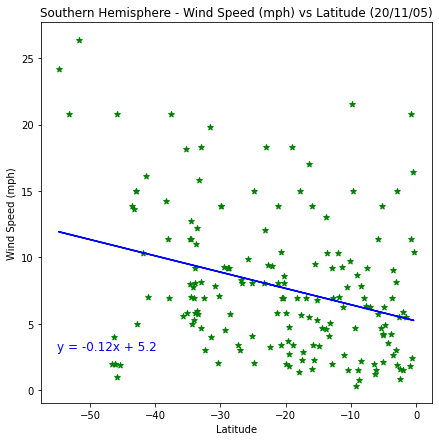

In [32]:
#create equation of line
line = south_wind.slope * south_x_lat + south_wind.intercept
line_eq = f"y = {round(south_wind.slope,2)}x + {round(south_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_wind, marker='*', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'b-')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 3), fontsize=12, color="blue")

file = os.path.join("images", "south_lat_wind.png")
plt.savefig(file)

**Wind Speed (mph) vs Latitude Linear Regression (Northern and Southern Hemisphere)**

* The correlation coefficient and linear regression model show a weak positive correlation between wind speed (mph) and latitude in the northern hemisphere.

* The correlation coefficient and linear regression model show an almost moderate negative correlation between wind speed (mph) and latitude in the southern hemisphere.

### Heat Map

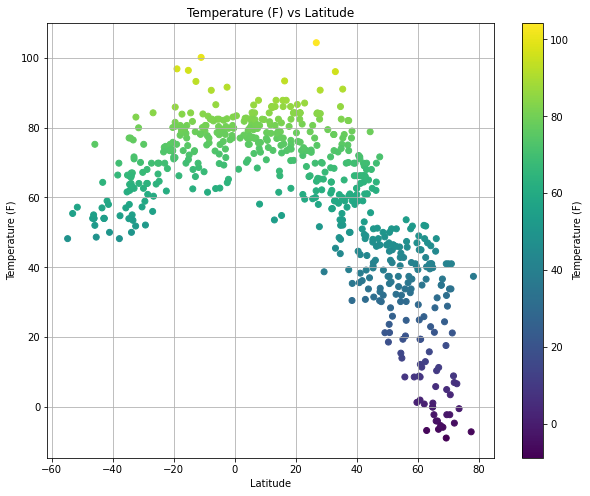

In [38]:
colors = y_temp

fig, ax = plt.subplots(figsize=(10,8))
ax.set_autoscale_on(True)
plt.scatter(x_lat,y_temp, c=colors)
colorbar = plt.colorbar()
colorbar.ax.set_ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")
plt.grid()

file = os.path.join("images", "heatmap.png")
plt.savefig(file)